In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/ML Datasets/airbnb-recruiting-new-user-bookings/train_users_2.csv/airbnb_new_user_bookings.csv')

In [ ]:
# Data Exploration and Visualization
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

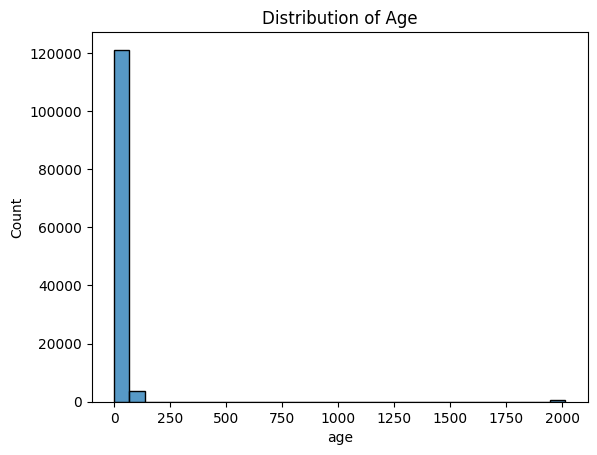

In [ ]:
# Visualizations
sns.histplot(data['age'].dropna(), bins=30)
plt.title('Distribution of Age')
plt.show()

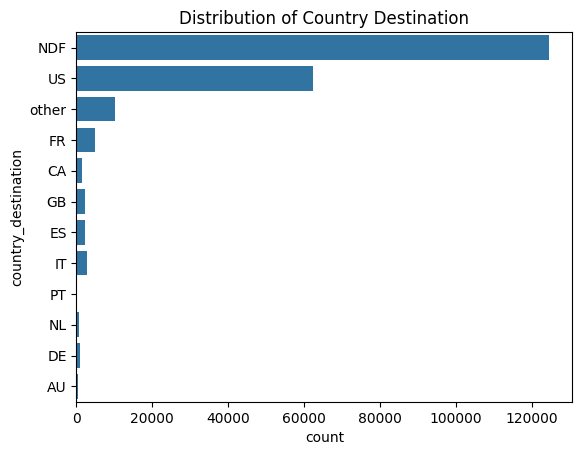

In [ ]:
sns.countplot(data['country_destination'])
plt.title('Distribution of Country Destination')
plt.show()

In [ ]:
# Data Cleaning and Preprocessing
# Handling missing values
data['age'].fillna(data['age'].mean(), inplace=True)
data['first_browser'].fillna('unknown', inplace=True)

In [ ]:
# Extracting features from 'timestamp_first_active'
data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')
data['year'] = data['timestamp_first_active'].dt.year
data['month'] = data['timestamp_first_active'].dt.month
data['day'] = data['timestamp_first_active'].dt.day

In [ ]:
# Encoding categorical variables
categorical_features = ['gender', 'signup_method', 'signup_flow', 'language',
                        'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
                        'signup_app', 'first_device_type', 'first_browser']
numerical_features = ['age', 'year', 'month', 'day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# Defining the target and features
X = data[numerical_features + categorical_features]
y = data['country_destination']

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Building the pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Training the model
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'year', 'month',
                                                   'day']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'signup_method',
                                                   'signup_flow', 'language',
                                                   'affiliate_channel',
                                                   'affiliate_provider',
                                                   'first_affiliate_tracked',
                                                   'signup_app',
                                                   'first_device_type',
                                                   'first_browser'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Predicting and Evaluating
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6051392565177672
Confusion Matrix:
 [[    0     0     0     0     0     0     0    74     0     0    40     0]
 [    0     0     0     0     0     0     0   184     0     0    91     0]
 [    0     0     0     0     0     0     0   142     0     0    66     0]
 [    0     0     0     0     0     0     0   293     0     0   158     0]
 [    0     0     0     0     0     0     0   661     0     0   349     0]
 [    0     0     0     0     0     0     0   337     0     0   160     0]
 [    0     0     0     0     0     0     0   398     0     0   164     0]
 [    0     0     0     0     0     0     0 21808     0     0  3035     0]
 [    0     0     0     0     0     0     0   102     0     0    53     0]
 [    0     0     0     0     0     0     0    29     0     0    16     0]
 [    0     0     0     0     0     0     0  8499     0     0  4026     0]
 [    0     0     0     0     0     0     0  1409     0     0   597     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

          AU       0.00      0.00      0.00       114
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       208
          ES       0.00      0.00      0.00       451
          FR       0.00      0.00      0.00      1010
          GB       0.00      0.00      0.00       497
          IT       0.00      0.00      0.00       562
         NDF       0.64      0.88      0.74     24843
          NL       0.00      0.00      0.00       155
          PT       0.00      0.00      0.00        45
          US       0.46      0.32      0.38     12525
       other       0.00      0.00      0.00      2006

    accuracy                           0.61     42691
   macro avg       0.09      0.10      0.09     42691
weighted avg       0.51      0.61      0.54     42691



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## Using XGBClassifier

# Convert target labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Define the model
xgb_model = XGBClassifier()

In [ ]:
# Create a ColumnTransformer with OneHotEncoder handling unknown categories
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
# Create a pipeline with updated preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

In [ ]:
# Fit the model
pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'signup_method',
                                                   'signup_flow', 'language',
                                                   'affiliate_channel',
                                                   'affiliate_provider',
                                                   'first_affiliate_tracked',
                                                   'signup_app',
                                                   'first_device_type',
                                                   'first_browser'])])),
                ('classifier',
                 XGBClassifier(base_score=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [ ]:
# Make predictions on the test set
y_pred_encoded = pipeline.predict(X_test)

In [ ]:
# Decode predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

In [ ]:
# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       114
          CA       0.00      0.00      0.00       275
          DE       0.00      0.00      0.00       208
          ES       0.00      0.00      0.00       451
          FR       0.00      0.00      0.00      1010
          GB       0.00      0.00      0.00       497
          IT       0.00      0.00      0.00       562
         NDF       0.70      0.85      0.77     24843
          NL       0.00      0.00      0.00       155
          PT       0.00      0.00      0.00        45
          US       0.50      0.49      0.49     12525
       other       0.14      0.00      0.00      2006

    accuracy                           0.64     42691
   macro avg       0.11      0.11      0.11     42691
weighted avg       0.56      0.64      0.59     42691



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
